#### Importing Libraries and Data Set

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Walmart_DataSet.csv')

#### Understanding the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [6]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


#### Data Cleaning

In [8]:
# Checking for null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [9]:
# Clean and convert 'Stay_In_Current_City_Years'
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)

In [10]:
# Drop IDs
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  int32 
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category            550068 non-null  int64 
 7   Purchase                    550068 non-null  int64 
dtypes: int32(1), int64(4), object(3)
memory usage: 31.5+ MB


#### Univariate Analysis

#### Gender Distribution

In [12]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

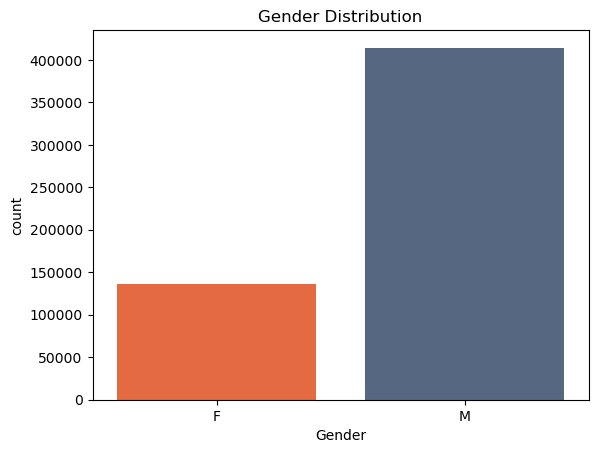

In [13]:
#Gender Distribution
sns.countplot(data = df, x = 'Gender' , palette = {"F" : "#FE5D26", "M" : "#4E6688"})
plt.title('Gender Distribution')
plt.show()

#### Age Group Distribution

In [14]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

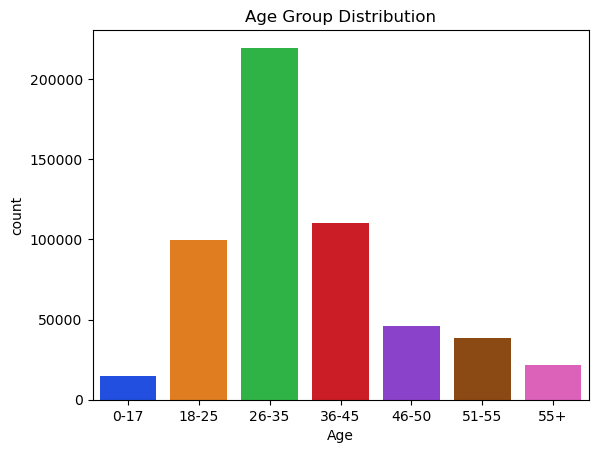

In [15]:
#Age Group Distribution
sns.countplot(data = df, x = 'Age' , palette = 'bright', order = sorted(df['Age'].unique()))
plt.title('Age Group Distribution')
plt.show()

#### City Category Distribution

In [16]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

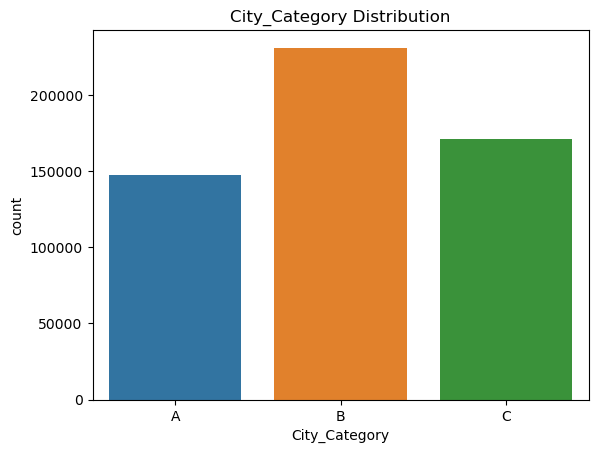

In [17]:
#City Category Distribution
sns.countplot(data = df, x = 'City_Category' ,order=['A', 'B', 'C'])
plt.title('City_Category Distribution')
plt.show()

#### Stay In Current City Years Distribution

In [18]:
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1    193821
2    101838
3     95285
4     84726
0     74398
Name: count, dtype: int64

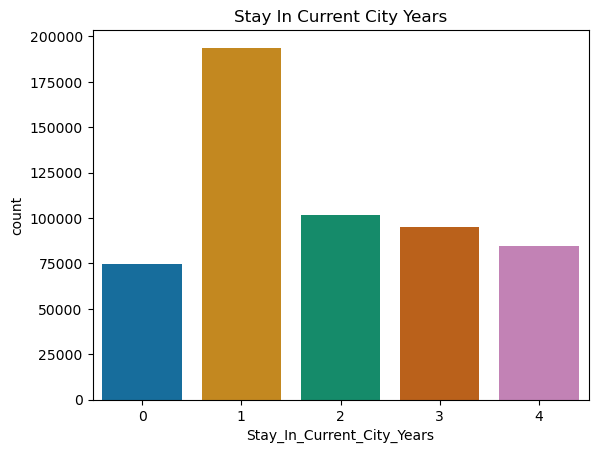

In [19]:
#Stay In Current City Years Distribution
sns.countplot(data = df, x = 'Stay_In_Current_City_Years' , palette = 'colorblind', order = sorted(df['Stay_In_Current_City_Years'].unique()))
plt.title('Stay In Current City Years')
plt.show()

#### Marital Status Distribution

In [20]:
df['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

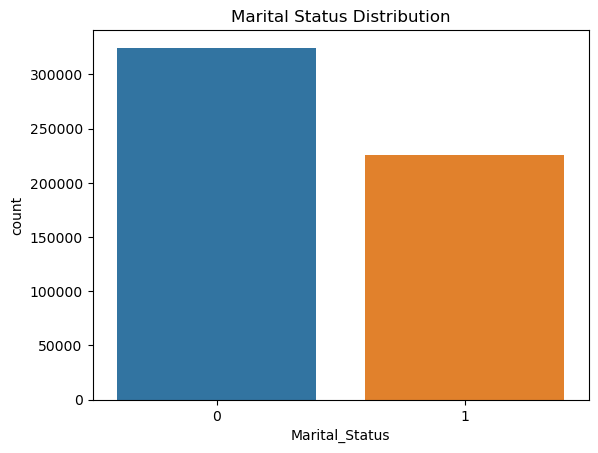

In [21]:
#Marital Status Distribution
sns.countplot(data = df, x = 'Marital_Status')
plt.title('Marital Status Distribution')
plt.show()

#### Occupation Distribution

Text(0.5, 1.0, 'Occupation Distribution')

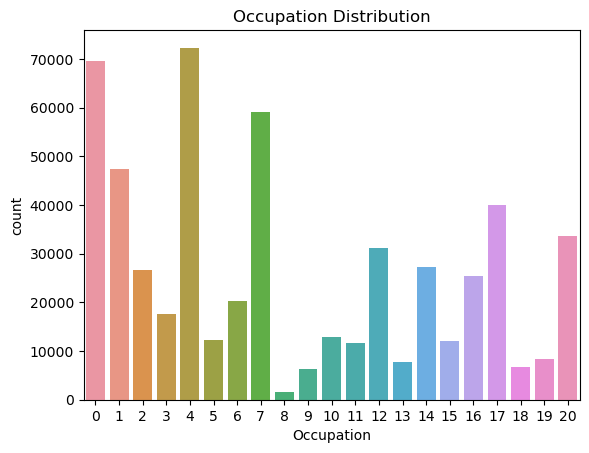

In [22]:
# Occupation Distribution
sns.countplot(data=df, x='Occupation')
plt.title('Occupation Distribution')

#### Product Category Distribution

Text(0.5, 1.0, 'Product Category Distribution')

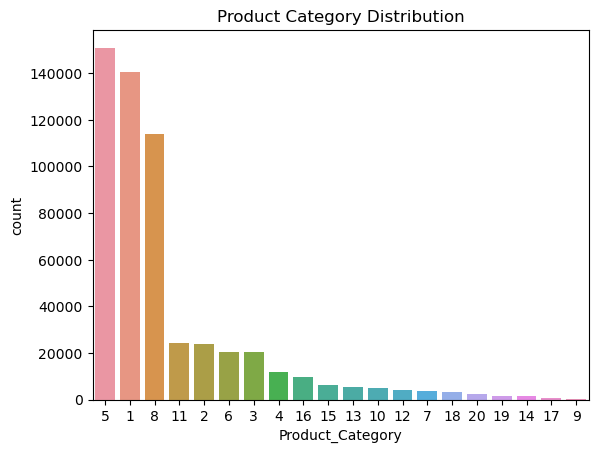

In [23]:
# Product Category Distribution
sns.countplot(data=df, x='Product_Category', order=df['Product_Category'].value_counts().index)
plt.title('Product Category Distribution')

#### Purchase Distribution

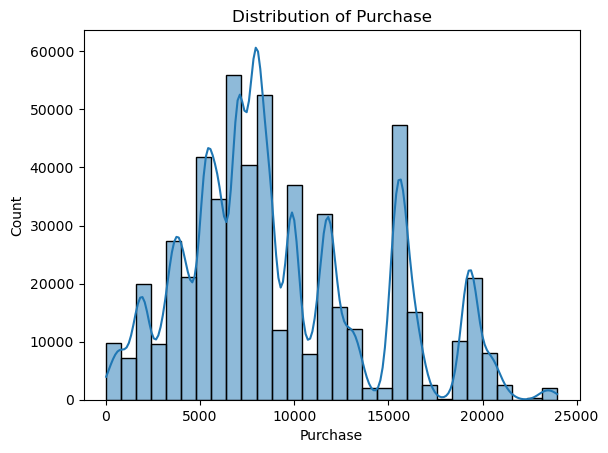

In [24]:
# Purchase Distribution
sns.histplot(data = df , x = 'Purchase',bins=30, kde=True)
plt.title("Distribution of Purchase")
plt.show()

#### Observations
* Right-skewed – Majority spend is on the lower-to-mid range.
* Multiple peaks – Indicates varied spending patterns.
* High-value outliers – Few large purchases drive the upper tail.


#### Bivariate Analysis

#### Purchase vs Gender

Text(0.5, 1.0, 'Purchase by Gender')

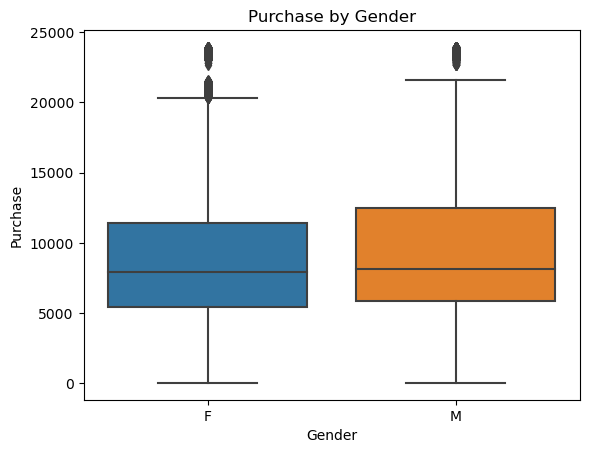

In [25]:
# Purchase vs Gender
sns.boxplot(data=df, x='Gender', y='Purchase')
plt.title('Purchase by Gender')

#### Observations
* Median purchase amounts are similar for both genders.
* Males show slightly higher variability and more extreme high-value purchases.


#### Purchase vs Age Group

Text(0.5, 1.0, 'Purchase by Age Group')

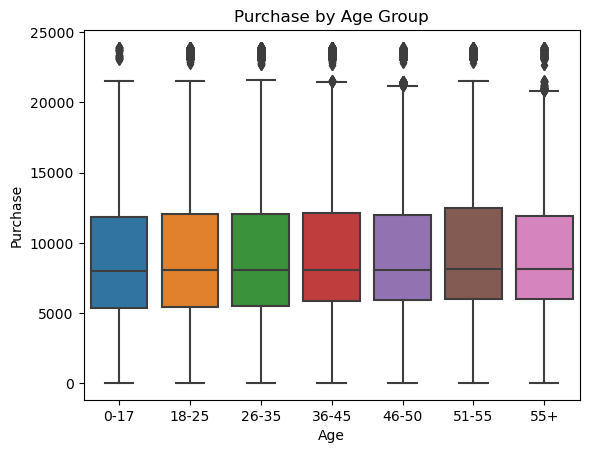

In [26]:
# Purchase vs Age Group
sns.boxplot(data=df, x='Age', y='Purchase', order=sorted(df['Age'].unique()))
plt.title('Purchase by Age Group')

#### Observations
* The median purchase amount  is fairly consistent across age groups which is 8,000.
* All groups show high-value outliers, with slightly higher variability in the 51–55 age group.


#### Purchase vs City Category

Text(0.5, 1.0, 'Purchase by City Category')

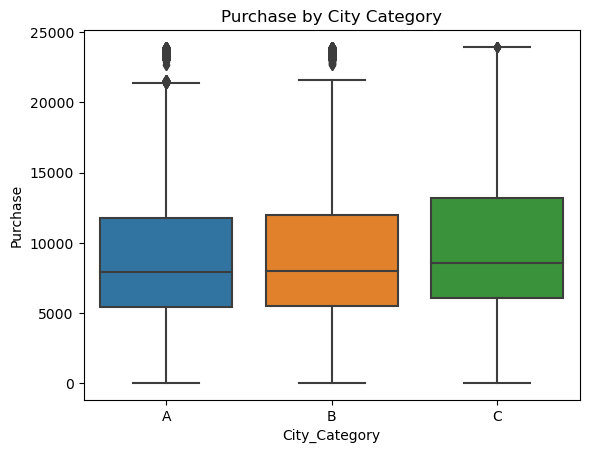

In [27]:
# Purchase vs City Category
sns.boxplot(data=df, x='City_Category', y='Purchase',order=['A', 'B', 'C'])
plt.title('Purchase by City Category')

#### Observations
* City C leads in median purchase — shoppers from City C spend slightly more than A and B.
* Spread and outliers are consistent — all cities show similar distribution and high-value purchases.


#### Purchase vs Stay In Current City Years

Text(0.5, 1.0, 'Purchase by Stay_In_Current_City_Years')

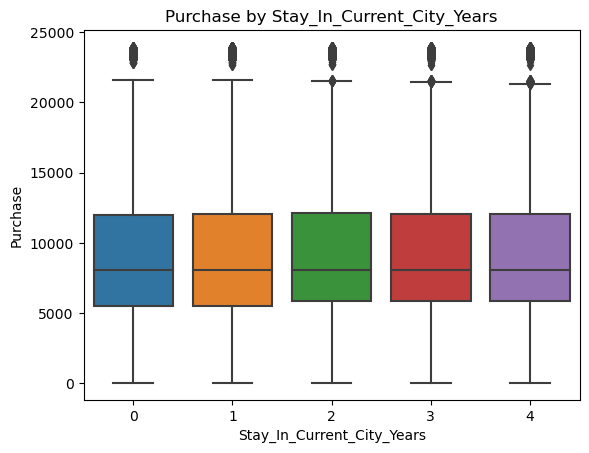

In [28]:
# Purchase vs Stay In Current City Years 
sns.boxplot(data=df, x='Stay_In_Current_City_Years', y='Purchase')
plt.title('Purchase by Stay_In_Current_City_Years')

#### Observations
* Median purchase remains stable across all stay durations — length of stay doesn't significantly affect spending.
* Outliers persist in all categories, indicating high purchases are not tied to city tenure.


#### Purchase vs Marital Status

Text(0.5, 1.0, 'Purchase by Marital Status')

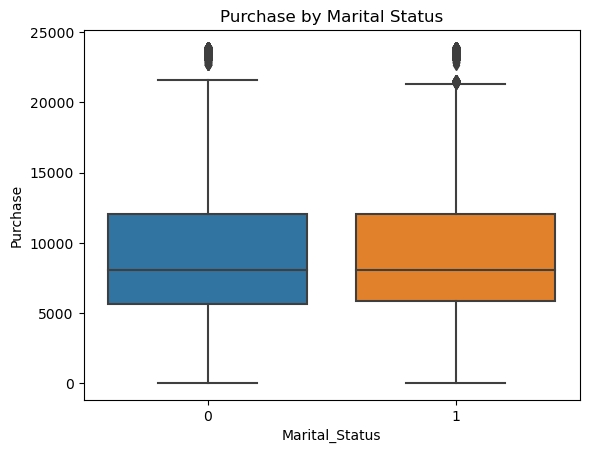

In [29]:
# Purchase vs Marital Status
sns.boxplot(data=df, x='Marital_Status', y='Purchase')
plt.title('Purchase by Marital Status')

#### Observations
* Median purchase is nearly identical for both married and not married groups — marital status has minimal effect on spending.
* Both groups show high-value outliers, indicating occasional big spenders regardless of marital status.


#### Correlation Heatmap

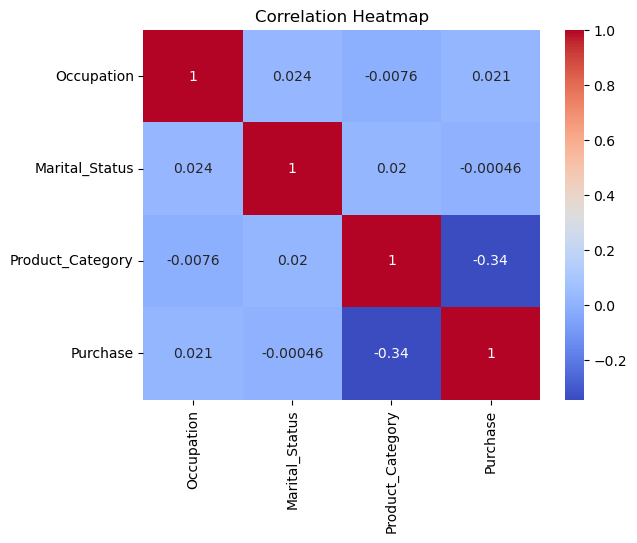

In [30]:
numerical_df = df.select_dtypes(include=['int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### Observations
* Product_Category vs Purchase shows a moderate negative correlation (-0.34) — higher category number, lower purchase amount.
* Other features like Occupation and Marital_Status have negligible impact on Purchase.
* Most features have very weak or no correlation with each other.


#### Machine Learning Modeling

In [31]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
    
# Split data
X = df.drop('Purchase', axis=1)
y = df['Purchase']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Define Models ===
models = {  
           "Decision Tree": DecisionTreeRegressor(random_state=42),
            "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
        }

# === Train, Predict and Evaluate ===
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    results[name] = {"MAE": mae, "RMSE": rmse, "R2 Score": r2}
    print(f"{name} Results: MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.4f}")

# === Compare Models ===
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)


Training Decision Tree...
Decision Tree Results: MAE=2186.09, RMSE=2992.93, R2=0.6435

Training Random Forest...
Random Forest Results: MAE=2172.29, RMSE=2957.53, R2=0.6519

Model Comparison:
                        MAE         RMSE  R2 Score
Decision Tree  2186.092937  2992.926859  0.643495
Random Forest  2172.287559  2957.531020  0.651877


#### Observations
* Random Forest outperforms Decision Tree on all metrics (MAE, RMSE, R²).
* MAE and RMSE are slightly lower in Random Forest, indicating more accurate predictions.
* R² Score is higher (0.6519 vs. 0.6435), meaning Random Forest explains more variance in the target.
* Overall, **Random Forest** is **better** and more reliable model in this comparison.


####  Key Insights
* City C has the highest median purchase values.
* Age group 51–55 shows the most variation in spending.
* Gender has minimal effect on purchase amounts.
* Marital status does not significantly influence spending.


#### Recommendations
* Focus marketing on City C, which shows higher average spending.
* Target Age 51–55 with personalized offers due to their variable spending behavior.
* Promote low-performing product categories to improve visibility and sales.
